In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [4]:
# 1. 数据清洗和准备
data = pd.read_csv("../NY_sample.csv")
data = data[(data['payment_type'] == 1) & (data['fare_amount'] > 0)
                      & (data['tip_amount'] > 0) & (data['trip_distance'] < 30)
                      & (data['tip_amount'] < 30)]
data = data.loc[:, ['tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'tip_amount']]
# data['fare_amount'] = data['total_amount'] - data['tip_amount']
# data = data.drop('total_amount', axis=1)

C:\Users\27143\AppData\Local\Temp\ipykernel_9352\999871432.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../NY_sample.csv")


In [5]:
data = data.dropna()
# print(data)
data["tpep_dropoff_datetime"] = pd.to_datetime(data["tpep_dropoff_datetime"])

# 2. 特征工程
data["dropoff_month"] = data["tpep_dropoff_datetime"].dt.month
# print(data["dropoff_month"])
data["dropoff_hour"] = data["tpep_dropoff_datetime"].dt.hour
# print(data["dropoff_hour"])
data["dropoff_weekday"] = data["tpep_dropoff_datetime"].dt.weekday
# print(data["dropoff_weekday"])
data = pd.get_dummies(data, columns=["dropoff_month", "dropoff_hour", "dropoff_weekday"])

In [6]:
# 3. 数据拆分
X = data.drop(columns=["tip_amount", "tpep_dropoff_datetime"])
y = data["tip_amount"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# 4. 建立贝叶斯回归模型
model = BayesianRidge()

In [8]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')  # Use 5-fold cross-validation
cv_scores = -cv_scores  # Since we want positive MSE values
print("Cross-validated MSE scores:", cv_scores)
print("Mean MSE:", cv_scores.mean())
print("Standard deviation of MSE:", cv_scores.std())

Cross-validated MSE scores: [2.85738459 2.38318703 2.35191944 2.14871649 2.26864167]
Mean MSE: 2.4019698439553787
Standard deviation of MSE: 0.24173294918582208


In [9]:
# 5. 模型训练
model.fit(X_train, y_train)

BayesianRidge()

In [10]:
# 6. 模型预测
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

MSE: 2.385570910290184
R-squared: 0.48813823962414726


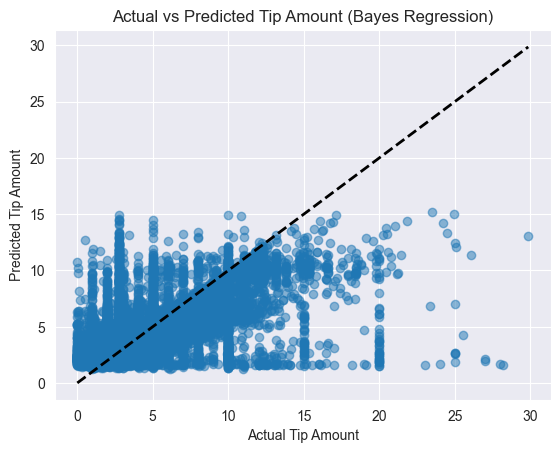

In [14]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # add a y=x line
plt.xlabel('Actual Tip Amount')
plt.ylabel('Predicted Tip Amount')
plt.title('Actual vs Predicted Tip Amount (Bayes Regression)')
plt.show()

In [12]:
# 准备输入数据
input_data = pd.DataFrame({
    'passenger_count': [4],
    'trip_distance': [4.3],
    'tpep_dropoff_datetime': ['05/07/2023 15:44']
})

# 对输入数据进行预处理
input_data["tpep_dropoff_datetime"] = pd.to_datetime(input_data["tpep_dropoff_datetime"])

input_data["dropoff_month"] = input_data["tpep_dropoff_datetime"].dt.month
input_data["dropoff_hour"] = input_data["tpep_dropoff_datetime"].dt.hour
input_data["dropoff_weekday"] = input_data["tpep_dropoff_datetime"].dt.weekday

input_data = pd.get_dummies(input_data, columns=["dropoff_month", "dropoff_hour", "dropoff_weekday"])

# 检查输入数据的列是否与训练数据相同
missing_cols = set(X_train.columns) - set(input_data.columns)
for c in missing_cols:
    input_data[c] = 0
input_data = input_data[X_train.columns]

# 输出转化后的输入数据
# print("转化后的输入数据：\n", input_data)

# 使用贝叶斯回归模型进行预测
predicted_tip_amount = model.predict(input_data)

# 输出预测结果
print("预测结果:", predicted_tip_amount)

预测结果: [3.36409803]
